<a href="https://colab.research.google.com/github/Douglas1997Ortiz/predicciones-de-ventas/blob/main/Proyecto1_parte4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
ventas_prediction= pd.read_csv('/content/drive/MyDrive/Coding Dojo/PROYECTO 1/sales_predictions.csv')
ventas_prediction.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# 1) ¿cuantas filas y columnas?
ventas_prediction.shape
# 8523 filas y 12 columnas 

(8523, 12)

In [6]:
# 2) ¿Cuáles son los tipos de datos en cada variable?
ventas_prediction.dtypes

# existen datos de tipo "objeto"-y valores "flotantes"

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# 3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.
ventas_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
# 3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.
ventas_prediction.duplicated()

# no existen valores duplicados

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [9]:
# 4) Identifiquen los valores faltantes.
valores_nulos = ventas_prediction.isnull()
total_valores_nulos= valores_nulos.sum()
print(total_valores_nulos)

# existen valores nulos en la columna "Weight" y "Size"

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [51]:
# 5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).
# Se decide eliminar estos valores faltantes ya que esta variable depende de una observacion especifica y no aleatoria
ventas_prediction_clean= ventas_prediction.dropna()
print(ventas_prediction_clean)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
4              NCD19        8.930          Low Fat         0.000000   
5              FDP36       10.395          Regular         0.000000   
...              ...          ...              ...              ...   
8517           FDF53       20.750              reg         0.083607   
8518           FDF22        6.865          Low Fat         0.056783   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692 

In [52]:
# 6) Confirmen que no hay valores faltantes después de abordarlos.
ventas_prediction_clean.shape

(4650, 12)

In [53]:
# 7) Encuentren y arreglen alguna categoría inconsistente de datos (ejemplo: arreglar cat, Cat, y cats para que sean consistentes) 
# se combina apply y lambda para que busque valores unicos por cada columna 
ventas_prediction_clean.apply(lambda x: x.unique())




Item_Identifier              [FDA15, DRC01, FDN15, NCD19, FDP36, FDO10, FDY...
Item_Weight                  [9.3, 5.92, 17.5, 8.93, 10.395, 13.65, 11.8, 1...
Item_Fat_Content                          [Low Fat, Regular, low fat, reg, LF]
Item_Visibility              [0.016047301, 0.019278216, 0.016760075, 0.0, 0...
Item_Type                    [Dairy, Soft Drinks, Meat, Household, Baking G...
Item_MRP                     [249.8092, 48.2692, 141.618, 53.8614, 51.4008,...
Outlet_Identifier                     [OUT049, OUT018, OUT013, OUT046, OUT035]
Outlet_Establishment_Year                       [1999, 2009, 1987, 1997, 2004]
Outlet_Size                                              [Medium, High, Small]
Outlet_Location_Type                                  [Tier 1, Tier 3, Tier 2]
Outlet_Type                             [Supermarket Type1, Supermarket Type2]
Item_Outlet_Sales            [3735.138, 443.4228, 2097.27, 994.7052, 556.60...
dtype: object

In [54]:
# 7) Encuentren y arreglen alguna categoría inconsistente de datos (ejemplo: arreglar cat, Cat, y cats para que sean consistentes)
# para realizar varios cambios utilizar{} con condiciones, despues utilizar replace con ()
cambios= {'low fat':'Low Fat', 'LF':'Low Fat', 'reg': 'Regular'}
ventas_prediction_clean['Item_Fat_Content'].replace(cambios, inplace= True)
print(ventas_prediction_clean)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
4              NCD19        8.930          Low Fat         0.000000   
5              FDP36       10.395          Regular         0.000000   
...              ...          ...              ...              ...   
8517           FDF53       20.750          Regular         0.083607   
8518           FDF22        6.865          Low Fat         0.056783   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692 

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
# 8) Para cualquier columna numérica, obtendrán las estadísticas resumidas para cada uno (mínimo, máximo y media)
ventas_prediction_clean.describe()
 
 # datos resumen estadisticos basicos 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4650.000000,4650.000000,4650.000000,4650.000000,4650.000000
mean,12.898675,0.060700,141.716328,1999.190538,2272.037489
std,4.670973,0.044607,62.420534,7.388800,1497.964740
min,4.555000,0.000000,31.490000,1987.000000,69.243200
25%,8.770000,0.025968,94.409400,1997.000000,1125.202000
50%,12.650000,0.049655,142.979900,1999.000000,1939.808300
75%,17.000000,0.088736,186.614150,2004.000000,3111.616300
max,21.350000,0.188323,266.888400,2009.000000,10256.649000


In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [56]:
ventas_prediction_clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Type'>

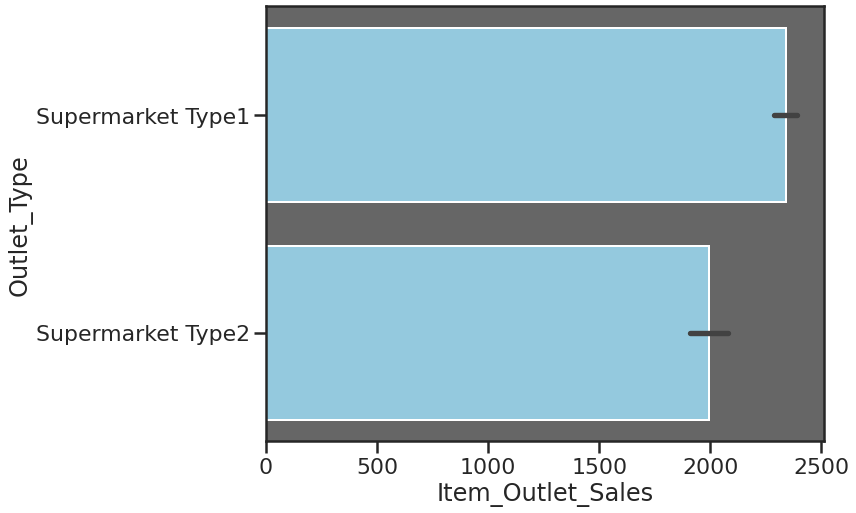

In [57]:
plt.figure(figsize=(10, 8)) #8 de ancho y 6 de largo
sns.set_context("poster")
sns.set_style("ticks", {"axes.facecolor": ".4"})
sns.barplot(data=ventas_prediction_clean,x= 'Item_Outlet_Sales',y= 'Outlet_Type', color= 'skyblue')

# El Supermarket tipo 1 es superior en ventas al Supermarket tipo 2, pero no por mucho valor 

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

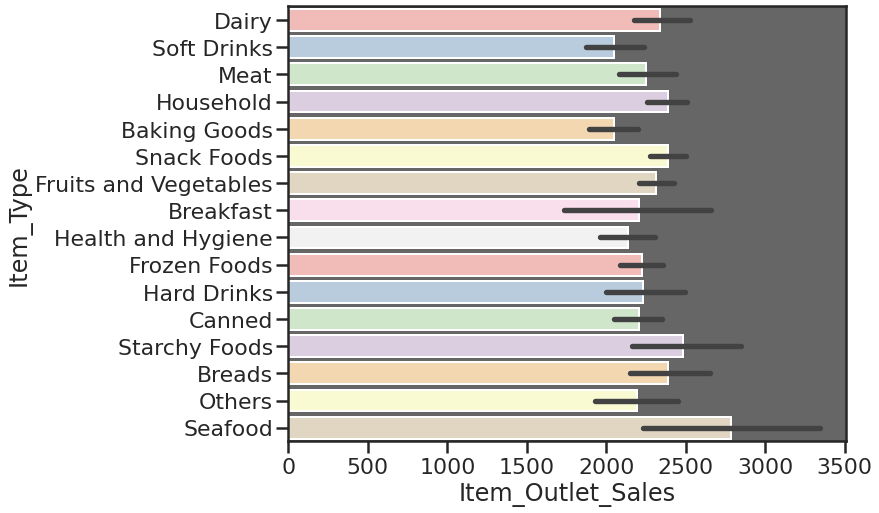

In [58]:
plt.figure(figsize=(10, 8)) #8 de ancho y 6 de largo
sns.set_context("poster")
sns.set_style("ticks", {"axes.facecolor": ".4"})
sns.barplot(data=ventas_prediction_clean,y= 'Item_Type',x= 'Item_Outlet_Sales',  color= 'purple', palette="Pastel1")

# Casi todos los productos se venden igual, pero su producto mas vendido aunque sea por poco es la comida del mar


<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

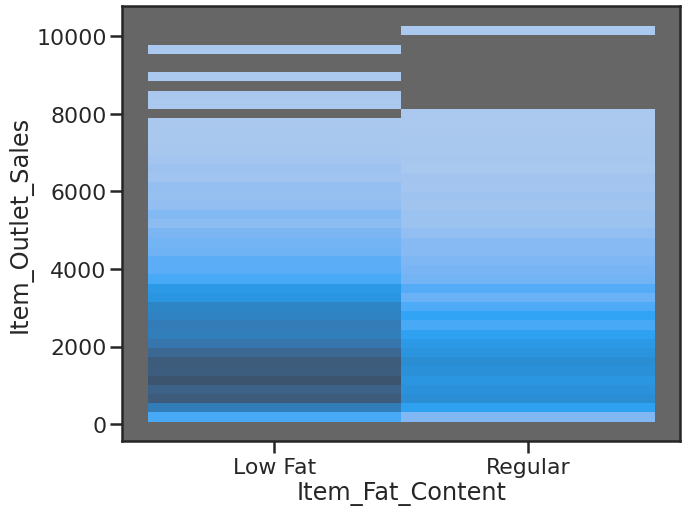

In [59]:
plt.figure(figsize=(10, 8)) #8 de ancho y 6 de largo
sns.set_context("poster")
sns.set_style("ticks", {"axes.facecolor": ".4"})
sns.histplot(data=ventas_prediction_clean, y= 'Item_Outlet_Sales', x= 'Item_Fat_Content', palette= 'brght')

# Las dos categorias de contenido de grasa se consumen casi por igual , pero existe un dato atipico en la categoria de Regular con mas de $10000 en venta 

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

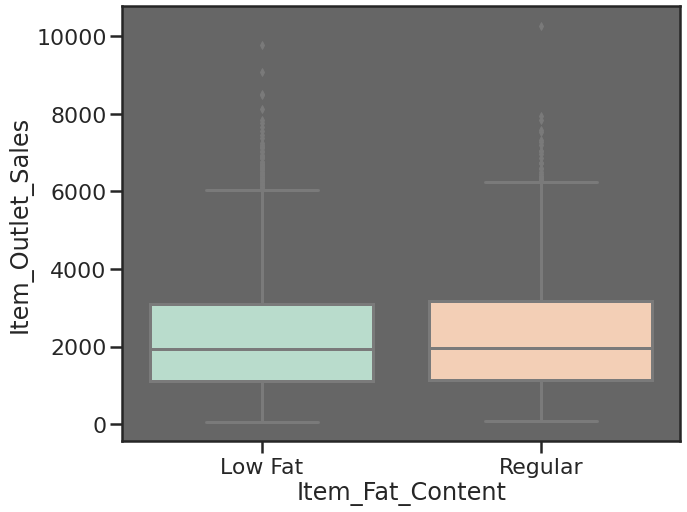

In [60]:
plt.figure(figsize=(10, 8)) #8 de ancho y 6 de largo
sns.set_context("poster")
sns.set_style("ticks", {"axes.facecolor": ".4"})
sns.boxplot(data=ventas_prediction_clean, y= 'Item_Outlet_Sales', x= 'Item_Fat_Content', palette= 'Pastel2')

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Visibility'>

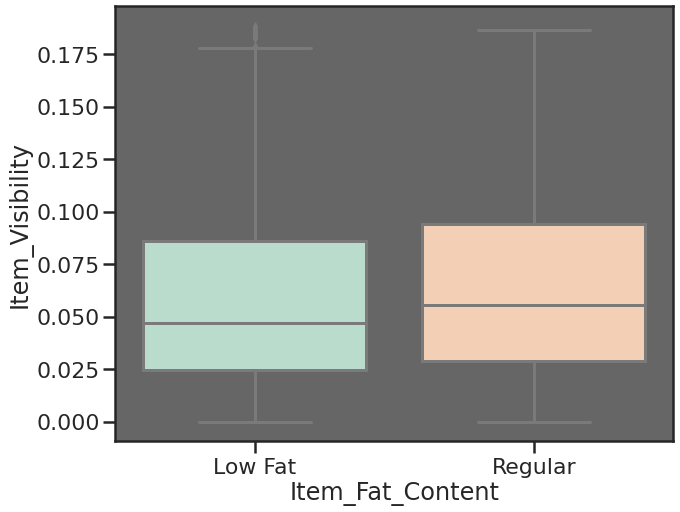

In [61]:
plt.figure(figsize=(10, 8)) #8 de ancho y 6 de largo
sns.set_context("poster")
sns.set_style("ticks", {"axes.facecolor": ".4"})
sns.boxplot(data=ventas_prediction_clean, y= 'Item_Visibility', x= 'Item_Fat_Content', palette= 'Pastel2')

<Figure size 720x1800 with 0 Axes>

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

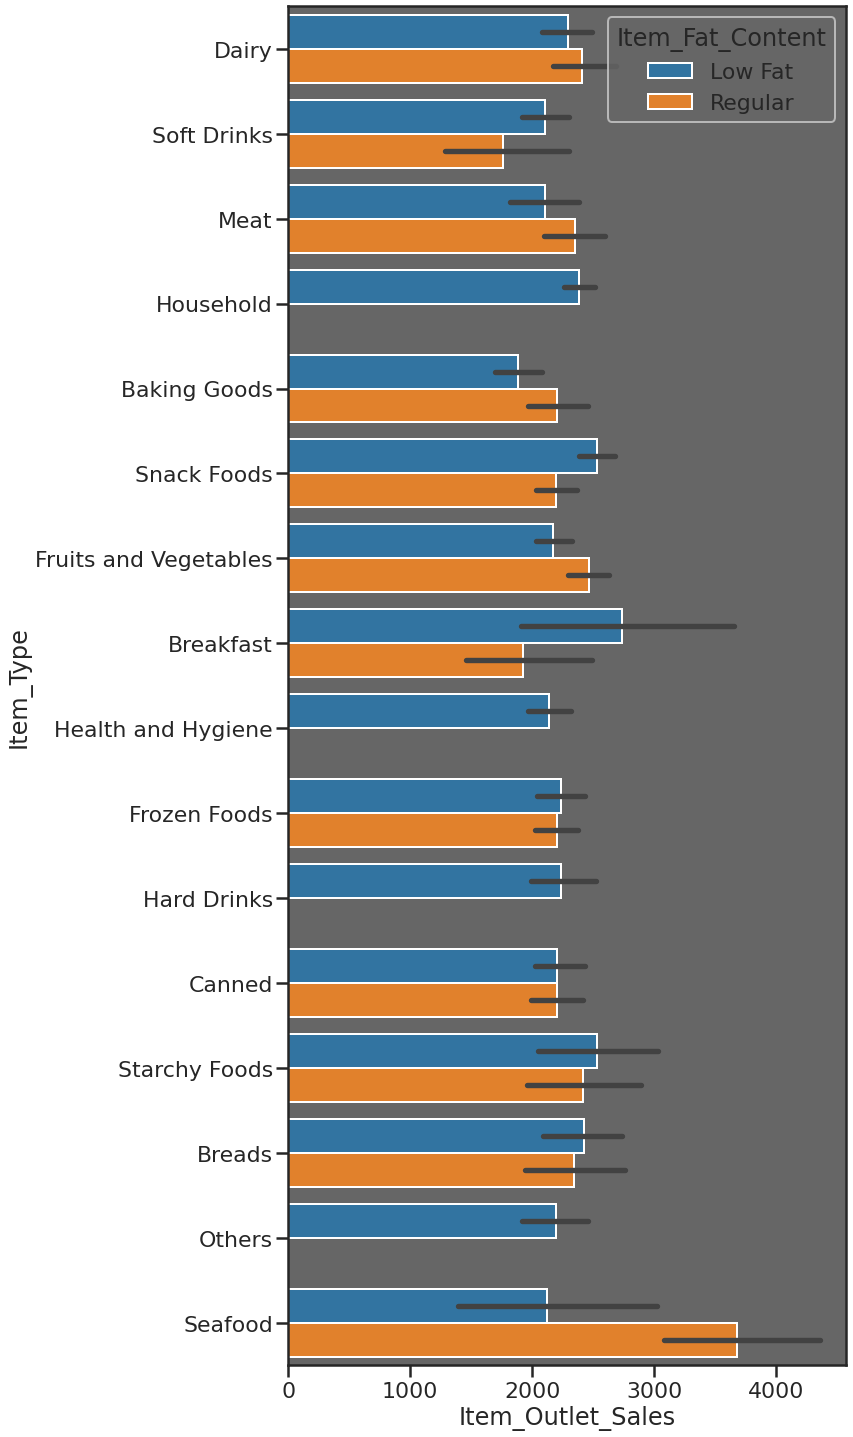

In [62]:
plt.figure(figsize=(10, 25)) #8 de ancho y 6 de largo
sns.set_context("poster")
sns.set_style("ticks", {"axes.facecolor": ".4"})
sns.barplot(data= ventas_prediction_clean, y='Item_Type', x= 'Item_Outlet_Sales', hue= 'Item_Fat_Content')

# El alimento que mas grasa tiene es la comida del mar y que mas dinero genera, las comidas congeladas generan lo mismo 


<Figure size 1440x1800 with 0 Axes>

<AxesSubplot:>

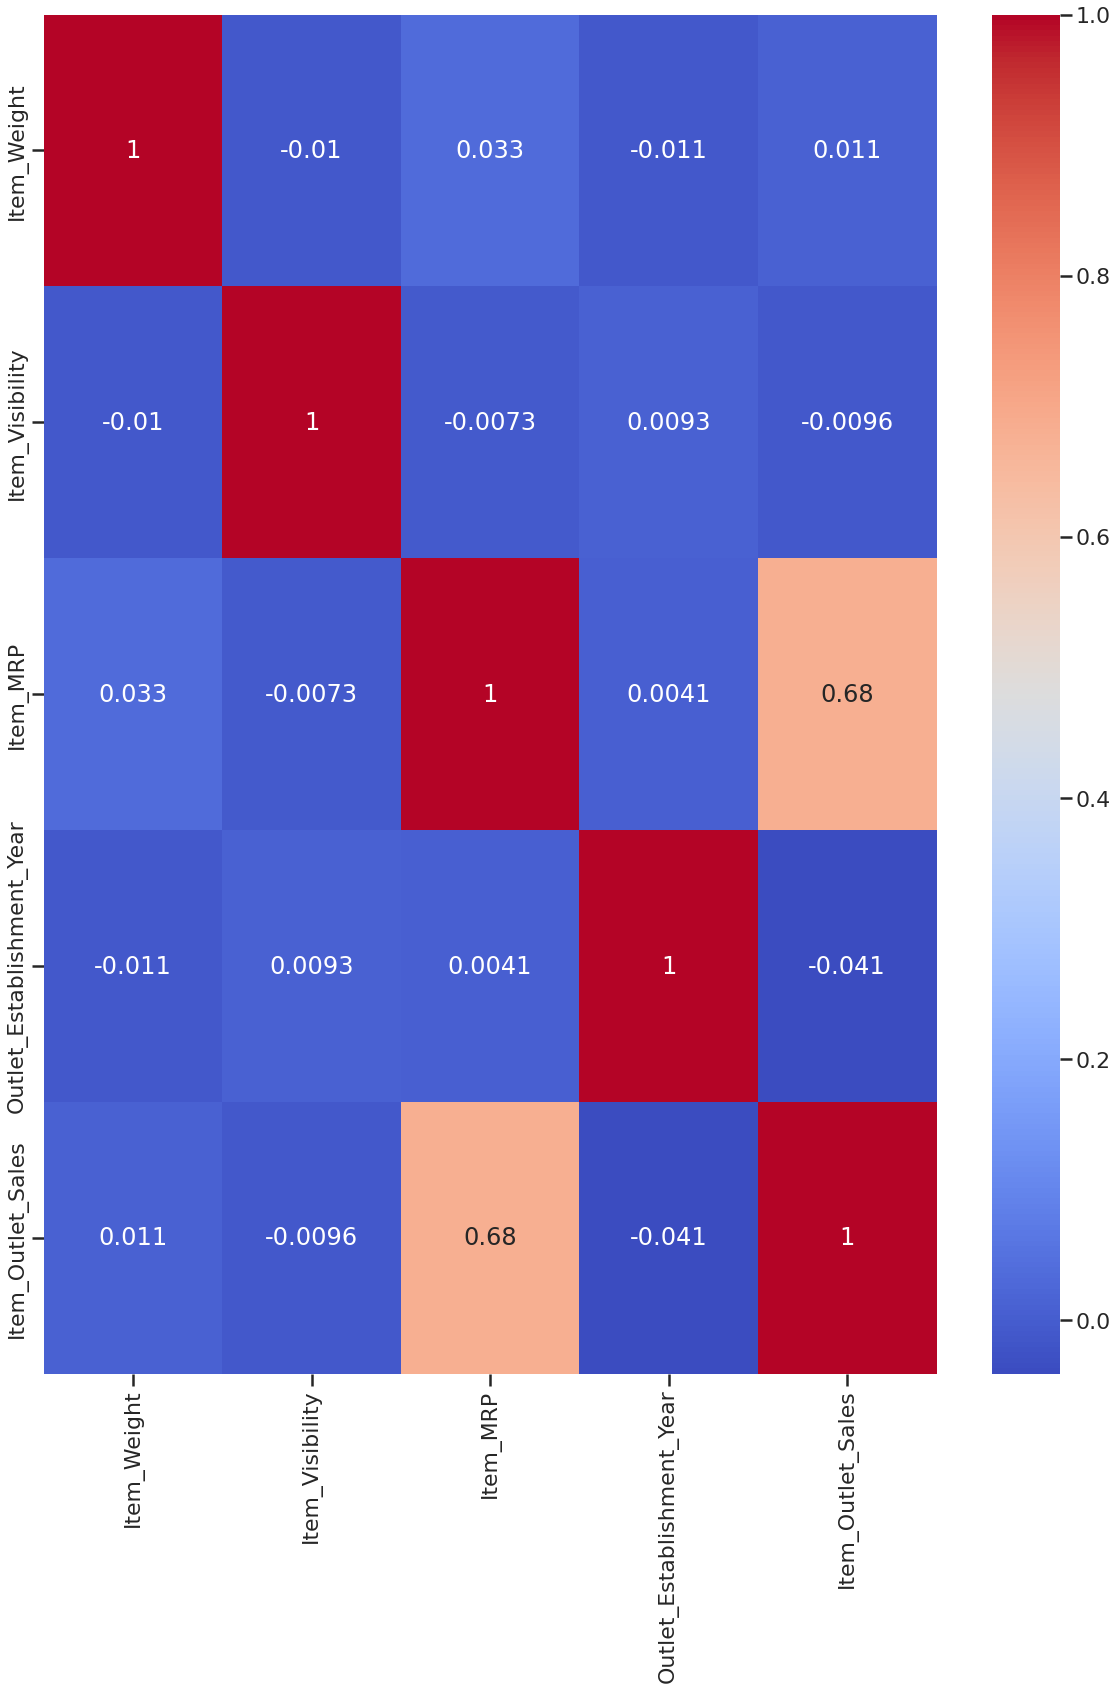

In [63]:
plt.figure(figsize=(20, 25)) #8 de ancho y 6 de largo
sns.set_context("poster")
sns.set_style("ticks", {"axes.facecolor": ".4"})
corr_matriz= ventas_prediction_clean.corr()
sns.heatmap(corr_matriz, annot= True, cmap= 'coolwarm')

# La unica correlacion positiva que se presenta es la de Item MRP y la de Item outlet sales, es decir mientras suba la una la otra tambien subira en 68%

In [64]:
ventas_prediction_clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [65]:
ventas_prediction_clean.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

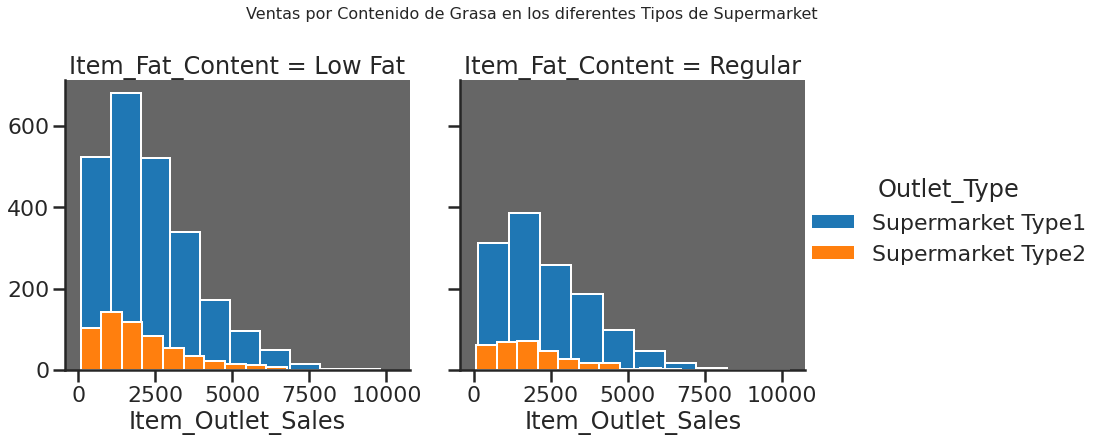

In [135]:
v =sns.FacetGrid(ventas_prediction_clean, col="Item_Fat_Content", hue="Outlet_Type", height=6)
v.map(plt.hist, "Item_Outlet_Sales" )
v.fig.suptitle('Ventas por Contenido de Grasa en los diferentes Tipos de Supermarket', y=1.05, fontsize=16)
v.add_legend();

# En el grafico podemos observar que los establecimientos de tipo 1, los productos de baja grasa son los mas vendidos, con relacion al supermercado tipo 2; tambien podemos observar que la tendencia de compra de los productos bajo en grasa y grasa regular, en el establecimiento de tipo 2 son casi parejos

Text(0.5, 1.05, 'Relacion entre la visibilidad de los productos y las ventas')

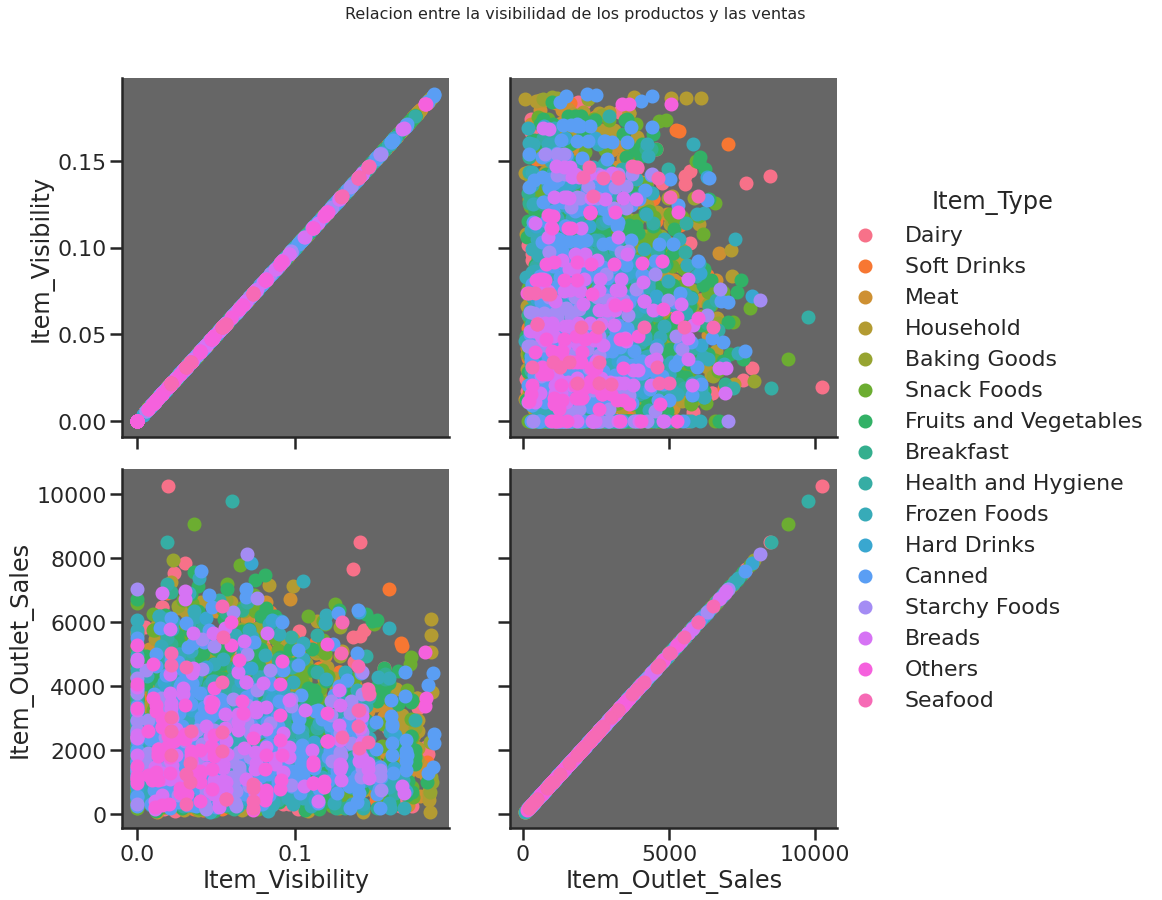

In [139]:
p= sns.PairGrid(ventas_prediction_clean, vars=["Item_Visibility", "Item_Outlet_Sales"], hue="Item_Type", height=6)
p.map(plt.scatter)
p.fig.suptitle('Relacion entre la visibilidad de los productos y las ventas', y=1.05, fontsize=16)
p.add_legend()

# La visibilidad de los productos y las ventas estan relacionadas positivamente.

Text(0.5, 0, 'Ventas')

Text(0.5, 0.5, 'Año de Establecieiento')

Text(0.5, 0, 'Peso x Producto')

Text(0.5, 0.92, 'Ventas vs Peso vs Años')

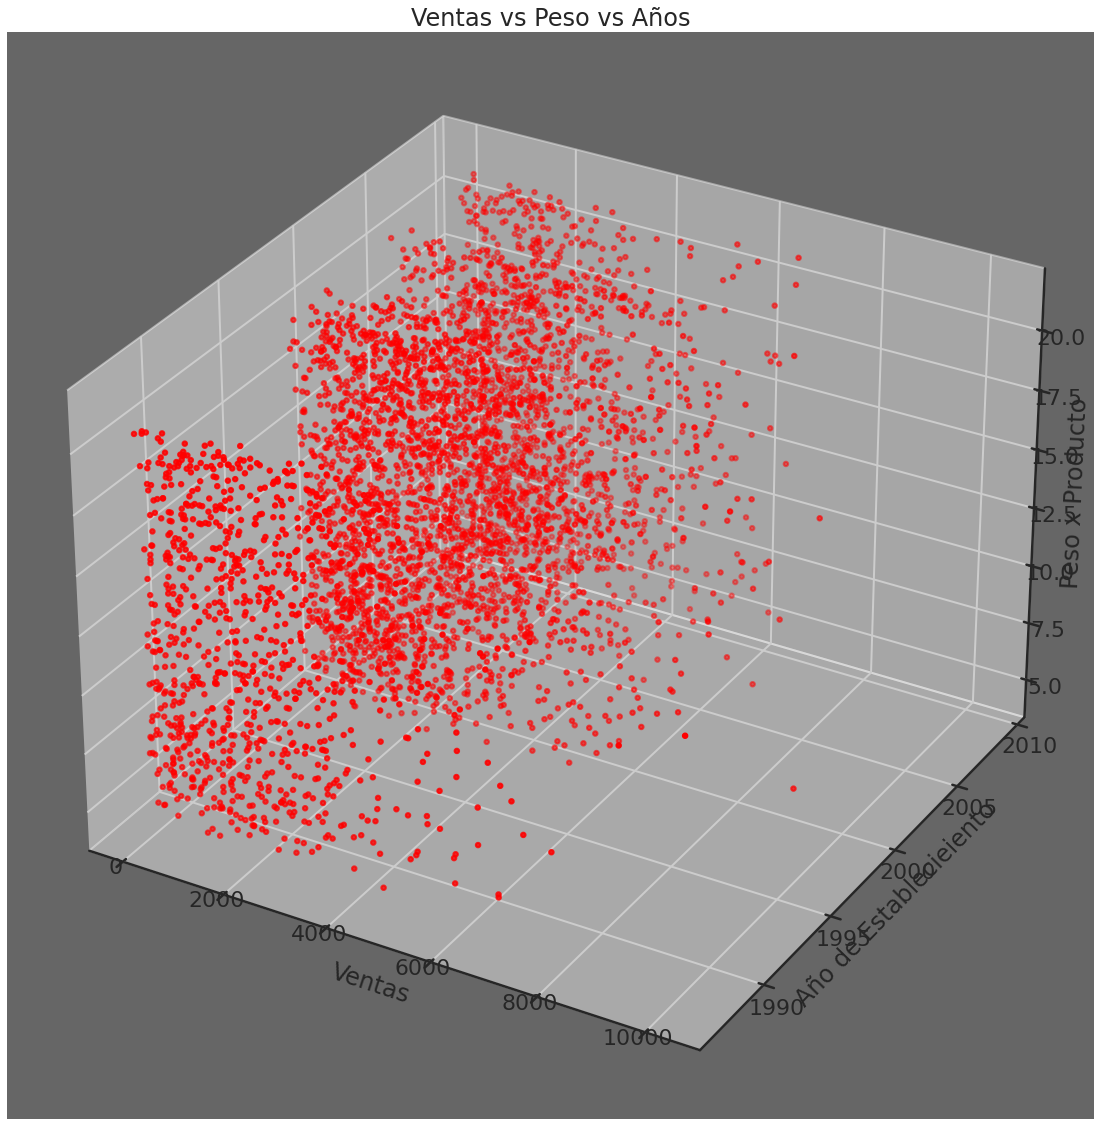

In [178]:
from mpl_toolkits.mplot3d import axes3d
# Creamos la figura
fig = plt.figure(figsize=(20,20))

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')
# tenemos que crear un array de numpy 
# plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
# Es necesario que los datos esten contenidos en un array bi-dimensional
ax1.scatter(ventas_prediction_clean['Item_Outlet_Sales'],ventas_prediction_clean['Outlet_Establishment_Year'],ventas_prediction_clean['Item_Weight'],c='r', marker='o')
ax1.xaxis.tick_top()
ax1.set_xlabel('Ventas')
ax1.set_ylabel('Año de Establecieiento')
ax1.set_zlabel('Peso x Producto')
ax1.set_title('Ventas vs Peso vs Años')
plt.show()